##Library imports

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Data Exploration

In [51]:
data1 = pd.read_csv("/content/redshifts.csv")
data2 = pd.read_csv("/content/vou_100.csv")

In [30]:
data1.head()

,redshift,name
0,NaN,4FGL_J0000.3-7355
1,NaN,4FGL_J0000.5+0743
2,1.106,4FGL_J0000.7+2530
3,NaN,4FGL_J0001.2+4741
4,NaN,4FGL_J0001.2-0747


In [8]:
data2.head()

,Unnamed: 0,frequency,nufnu,nufnu_upper,nufnu_lower,start_time,end_time,flag,Catalog,nufnu_err,source_name
0,1006376,1.400000e+09,3.042000e-15,3.133000e-15,2.951000e-15,55000.0,55000.0,Det,NVSS,9.100000e-17,4FGL_J0001.5+2113
1,1006377,8.870000e+08,1.838000e-15,1.976000e-15,1.699000e-15,55000.0,55000.0,Det,RACS,1.385000e-16,4FGL_J0001.5+2113
2,1006378,8.870000e+08,1.838000e-15,1.976000e-15,1.699000e-15,55000.0,55000.0,Det,RACS,1.385000e-16,4FGL_J0001.5+2113
3,1006379,3.000000e+09,5.814000e-15,5.875000e-15,5.754000e-15,55000.0,55000.0,Det,VLASSQL,6.050000e-17,4FGL_J0001.5+2113
4,1006380,2.418000e+17,5.303000e-13,8.079000e-13,2.526000e-13,55000.0,55000.0,Det,XMMSL2,2.776500e-13,4FGL_J0001.5+2113


In [53]:
data1.shape, data2.shape

((6659, 2), (86204, 11))

In [52]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6659 entries, 0 to 6658
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   redshift  1591 non-null   float64
 1   name      6659 non-null   object 
dtypes: float64(1), object(1)
memory usage: 104.2+ KB


In [29]:
 data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86204 entries, 0 to 86203
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   86204 non-null  int64  
 1   frequency    86204 non-null  float64
 2   nufnu        86204 non-null  float64
 3   nufnu_upper  86204 non-null  float64
 4   nufnu_lower  86204 non-null  float64
 5   start_time   86204 non-null  float64
 6   end_time     86204 non-null  float64
 7   flag         86204 non-null  object 
 8   Catalog      86204 non-null  object 
 9   nufnu_err    86204 non-null  float64
 10  source_name  86204 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 7.2+ MB


In [54]:
data1.dropna(subset=['redshift'], inplace = True)
data1.shape

(1591, 2)

In our Exploratory Data Analysis, we focus on redshift as a key variable. To maintain data integrity, data points without redshift values have been dropped.

In [55]:
len(data1['name'].unique()), len(data2['source_name'].unique())

(1591, 100)

In [56]:
data1['name'].isin(data2['source_name']).sum()

100

All points in data2 are present in data1, so we can add the redshift data (data1) to data2.

In [91]:
df = data1.merge(data2, left_on='name', right_on='source_name', how="right").drop("source_name", axis=1)

In [58]:
df.shape

(86204, 12)

In [44]:
df.head()

,redshift,name,Unnamed: 0,frequency,nufnu,nufnu_upper,nufnu_lower,start_time,end_time,flag,Catalog,nufnu_err
0,0.09983,4FGL_J0001.5+2113,1006376,1.400000e+09,3.042000e-15,3.133000e-15,2.951000e-15,55000.0,55000.0,Det,NVSS,9.100000e-17
1,0.09983,4FGL_J0001.5+2113,1006377,8.870000e+08,1.838000e-15,1.976000e-15,1.699000e-15,55000.0,55000.0,Det,RACS,1.385000e-16
2,0.09983,4FGL_J0001.5+2113,1006378,8.870000e+08,1.838000e-15,1.976000e-15,1.699000e-15,55000.0,55000.0,Det,RACS,1.385000e-16
3,0.09983,4FGL_J0001.5+2113,1006379,3.000000e+09,5.814000e-15,5.875000e-15,5.754000e-15,55000.0,55000.0,Det,VLASSQL,6.050000e-17
4,0.09983,4FGL_J0001.5+2113,1006380,2.418000e+17,5.303000e-13,8.079000e-13,2.526000e-13,55000.0,55000.0,Det,XMMSL2,2.776500e-13


In [45]:
df.isnull().sum()

redshift       0
name           0
Unnamed: 0     0
frequency      0
nufnu          0
nufnu_upper    0
nufnu_lower    0
start_time     0
end_time       0
flag           0
Catalog        0
nufnu_err      0
dtype: int64

We do mot have any missing data.

In [92]:
anomalies1 = df[df['nufnu_lower'] > df['nufnu']].index
anomalies2 = df[df['nufnu_upper'] < df['nufnu']].index
print("Anomaly percentage", round((len(anomalies1) + len(anomalies2))/ len(df['nufnu'])*100,2), "%")
df = df.drop(anomalies1).drop(anomalies2)
df.shape

Anomaly percentage 0.25 %


(85988, 12)

We identify and removes anomalies in the 'nufnu' column based on upper and lower bounds. DataFrame is updated to exclude these anomalies.

##Data Visualization

In [46]:
cols =  df.columns
cols

Index(['redshift', 'name', 'Unnamed: 0', 'frequency', 'nufnu', 'nufnu_upper',
       'nufnu_lower', 'start_time', 'end_time', 'flag', 'Catalog',
       'nufnu_err'],
      dtype='object')

<ipython-input-67-b375d903abd2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df[cols].corr()


<Axes: >

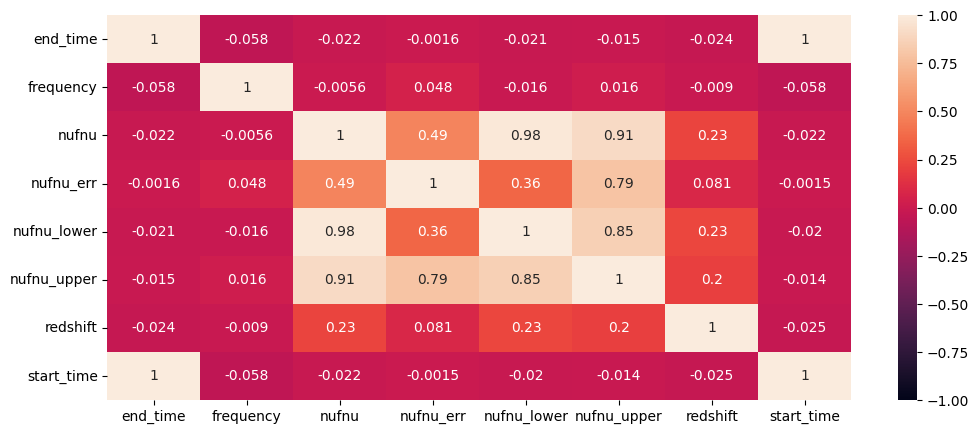

In [67]:
cols =  df.columns.difference(['Unnamed: 0'])
correlation = df[cols].corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1)

Redshift has very low correlation with other variables.

The values of nufnu, nufnu_upper, and nufnu_lower are closely corelated, which is expected.

Start time and end time are very simmilar.

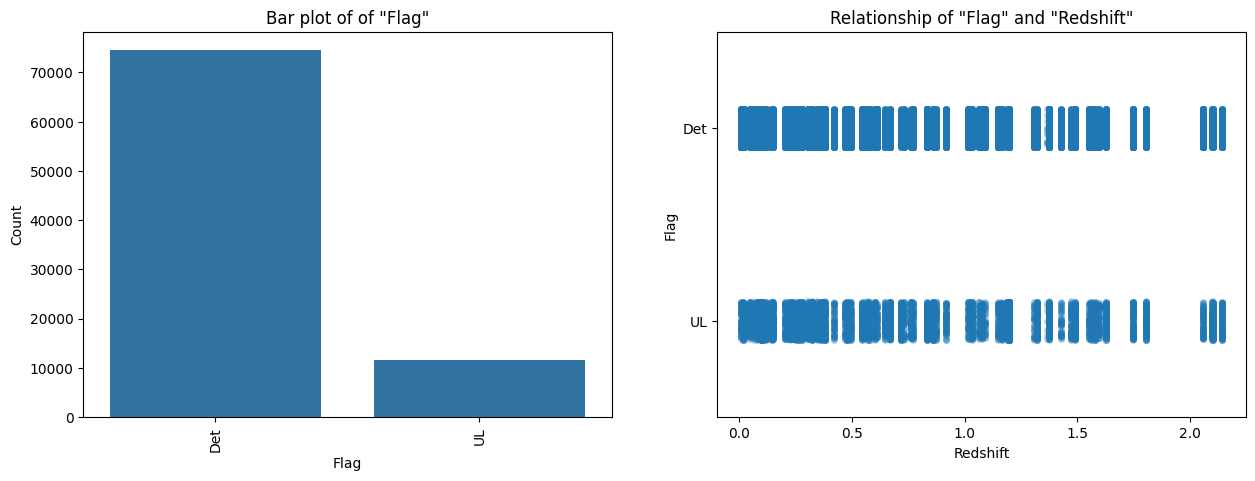

In [79]:
ig, ax = plt.subplots(ncols=2, figsize=(15, 5))

sns.countplot(x='flag', data=df, ax=ax[0])
ax[0].set_title('Bar plot of of "Flag"')
ax[0].set_xlabel('Flag')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=90)

sns.stripplot(x='redshift', y='flag', data=df, ax=ax[1], alpha=0.3)
ax[1].set_title('Relationship of "Flag" and "Redshift"')
ax[1].set_xlabel('Redshift')
ax[1].set_ylabel('Flag')
plt.show()

The Det category has way more occurrences than the UL category, showing that most measurements are real detections.

The distribution of redshift is similar for both 'Det' and 'UL' flags.

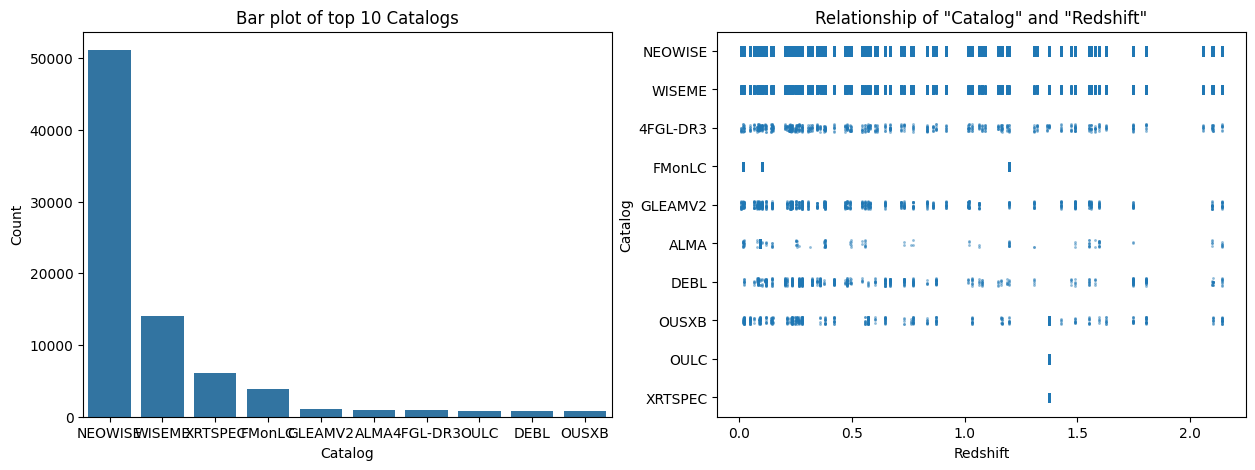

In [95]:
top_categories = df['Catalog'].value_counts().index[:10]

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

sns.countplot(x='Catalog', data=df[df['Catalog'].isin(top_categories)], ax=ax[0], order=top_categories)
ax[0].set_title('Bar plot of top 10 Catalogs')
ax[0].set_xlabel('Catalog')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x')

sns.stripplot(x='redshift', y='Catalog', data=df[df['Catalog'].isin(top_categories)], ax=ax[1], alpha=0.5, size=2)
ax[1].set_title('Relationship of "Catalog" and "Redshift"')
ax[1].set_xlabel('Redshift')
ax[1].set_ylabel('Catalog')

plt.show()


The majority of the observations in our dataset comeS from "NEOWISE" and "WISEME" catalogs.

The distribution of Redshift within each Catalog category varies, with some categories showing a wider range than others ("NEOWISE" and "WISEME" have similar range). Some have more narrow or specific range of redshift values.

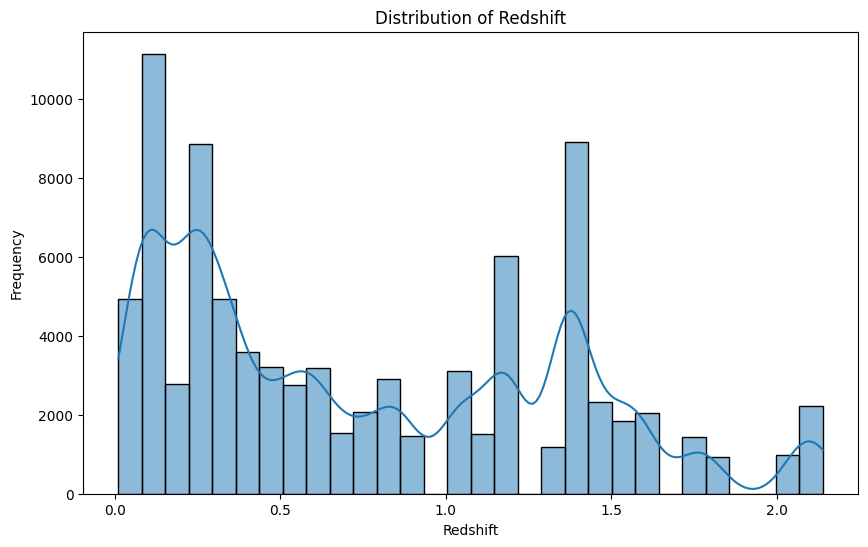

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(df['redshift'], kde=True, bins=30)
plt.title('Distribution of Redshift')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.show()


The histogram, with Kernel Density Estimate, shows a non-normal distribution in the redshift data. The presence of multiple peaks and the asymmetrical shape shows a multi-modal distribution, implying the presence of distinct groups of data points.

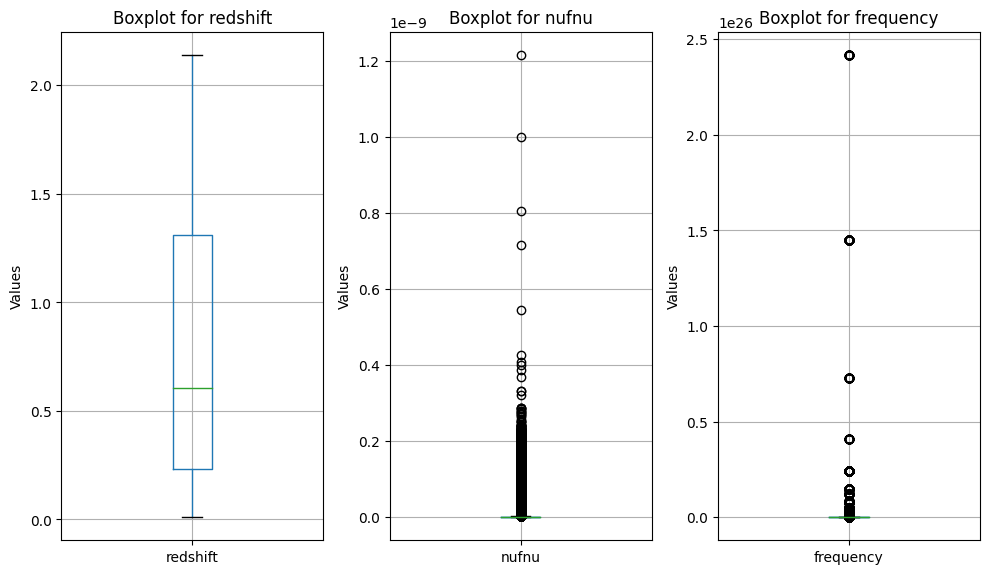

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

df.boxplot(column='redshift', ax=axes[0])
axes[0].set_title('Boxplot for redshift')
axes[0].set_ylabel('Values')

df.boxplot(column='nufnu', ax=axes[1])
axes[1].set_title('Boxplot for nufnu')
axes[1].set_ylabel('Values')

df.boxplot(column='frequency', ax=axes[2])
axes[2].set_title('Boxplot for frequency')
axes[2].set_ylabel('Values')

plt.tight_layout()
plt.show()

1. Boxplot for redshift:
   - The data is spread out between 0 and approximately 2.2.
   - The median (green line) is around 1.0.
   - The interquartile range (IQR), represented by the box, spans approximately from 0.5 to 1.5, suggesting that the middle 50% of the data falls within this range.
   - There do not appear to be any outliers, as there are no data points depicted beyond the whiskers.

2. Boxplot for nufnu:
   - The data values are very small.
   - The median is close to 0 but positive.
   - The IQR is extremely narrow, indicating very little variation in the middle 50% of the data points.
   - There is a large number of outliers that are significantly higher than the rest of the data, with values reaching up to approximately 1.2e-9.

3. Boxplot for frequency:
   - The median is close to 0, but not exactly.
   - The IQR is very small, similar to the nufnu plot, suggesting low variance in the middle 50% of the data points.
   - There are several outliers, with the highest reaching about 2.5e26.

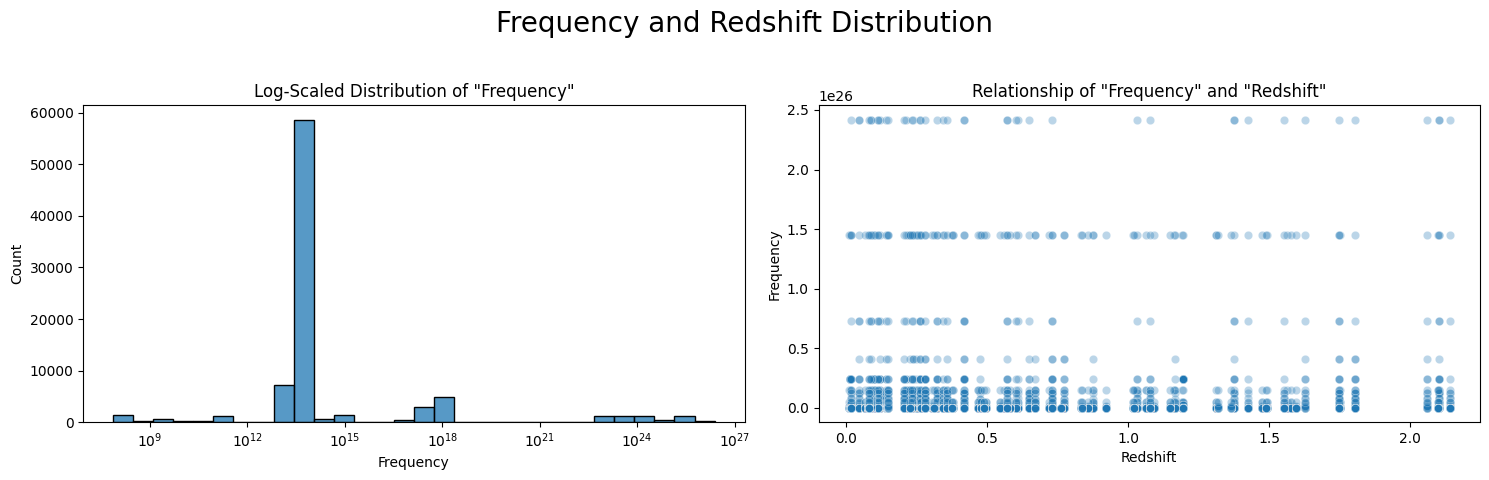

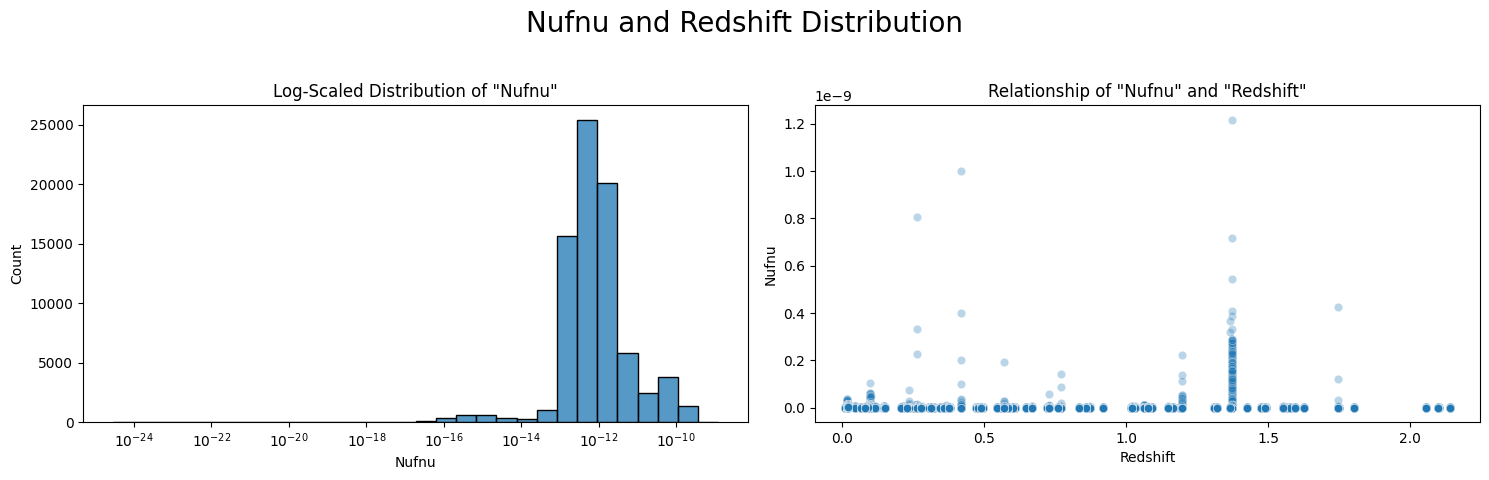

In [76]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
fig.suptitle('Frequency and Redshift Distribution', fontsize=20)

sns.histplot(x='frequency', data=df, ax=ax[0], bins=30, log_scale=True)
ax[0].set_title('Log-Scaled Distribution of "Frequency"')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Count')

sns.scatterplot(x='redshift', y='frequency', data=df, ax=ax[1], alpha=0.3)
ax[1].set_title('Relationship of "Frequency" and "Redshift"')
ax[1].set_xlabel('Redshift')
ax[1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plotting the second set of subplots
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
fig.suptitle('Nufnu and Redshift Distribution', fontsize=20)

sns.histplot(x='nufnu', data=df, ax=ax[0], bins=30, log_scale=True)
ax[0].set_title('Log-Scaled Distribution of "Nufnu"')
ax[0].set_xlabel('Nufnu')
ax[0].set_ylabel('Count')

sns.scatterplot(x='redshift', y='nufnu', data=df, ax=ax[1], alpha=0.3)
ax[1].set_title('Relationship of "Nufnu" and "Redshift"')
ax[1].set_xlabel('Redshift')
ax[1].set_ylabel('Nufnu')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The "Frequency" data was predominantly clustered near zero, indicating a significant skewness in the distribution.
The scatter plot analysis shows that the emission frequency of blazars does not have a direct correlation with their redshift.

As redshift goes up, the nufnu values become less spread out, and points look more clustered horizontally. However, the scatter plot doesn't show a clear pattern in how nufnu and redshift are related.